# Qualifying Performance Brazil

## Imports & Settings

In [1]:
import pandas as pd
import fastf1 as ff1
import seaborn as sns
import matplotlib.pyplot as plt
from fastf1 import plotting
# plotting.setup_mpl()
pd.set_option('display.max_columns', 500)
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

In [2]:
ff1.Cache.enable_cache('cache/')

## Data Loading

In [9]:
round_ = 19 # Brazil = 19
race = ff1.get_session(2021, 'Brazil', 'R') # Get Qualifying Data
race.name

'Race'

In [11]:
race_laps = race.load_laps(with_telemetry=True) # Load Lap Data for Qualifying

core           INFO 	Loading laps for São Paulo Grand Prix - Race [v2.1.10]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['33', '3', '6', '22', '77', '63', '44', '10', '9', '5', '4', '11', '18', '7', '14', '16', '55', '99', '31', '47']


## Prepare Telemetry Data per Driver per Lap

In [12]:
race_laps

Time DriverNumber                LapTime  LapNumber  \
0    0 days 01:03:12.524000           77                    NaT          1   
1    0 days 01:04:27.821000           77 0 days 00:01:15.297000          2   
2    0 days 01:05:42.775000           77 0 days 00:01:14.954000          3   
3    0 days 01:06:57.612000           77 0 days 00:01:14.837000          4   
4    0 days 01:08:15.100000           77 0 days 00:01:17.488000          5   
...                     ...          ...                    ...        ...   
1355 0 days 02:29:49.634000            7 0 days 00:01:13.974000         66   
1356 0 days 02:31:03.449000            7 0 days 00:01:13.815000         67   
1357 0 days 02:32:17.837000            7 0 days 00:01:14.388000         68   
1358 0 days 02:33:31.619000            7 0 days 00:01:13.782000         69   
1359 0 days 02:34:45.917000            7 0 days 00:01:14.298000         70   

      Stint             PitOutTime PitInTime            Sector1Time  \
0         1 0 days 00:25:22.179000       NaT                    NaT   
1         1                    NaT       NaT 0 days 00:00:19.229000   
2         1                    NaT       NaT 0 days 00:00:19.139000   
3         1                    NaT       NaT 0 days 00:00:18.932000   
4         1                    NaT       NaT 0 days 00:00:21.747000   
...     ...                    ...       ...                    ...   
1355      6                    NaT       NaT 0 days 00:00:18.974000   
1356      6                    NaT       NaT 0 days 00:00:18.875000   
1357      6                    NaT       NaT 0 days 00:00:18.966000   
1358      6                    NaT       NaT 0 days 00:00:18.976000   
1359      6                    NaT       NaT 0 days 00:00:18.965000   

                Sector2Time            Sector3Time     Sector1SessionTime  \
0    0 days 00:00:39.804000 0 days 00:00:17.134000                    NaT   
1    0 days 00:00:38.896000 0 days 00:00:17.172000 0 days 01:03:31.753000   
2    0 days 00:00:38.719000 0 days 00:00:17.096000 0 days 01:04:46.960000   
3    0 days 00:00:38.764000 0 days 00:00:17.141000 0 days 01:06:01.707000   
4    0 days 00:00:38.545000 0 days 00:00:17.196000 0 days 01:07:19.359000   
...                     ...                    ...                    ...   
1355 0 days 00:00:37.960000 0 days 00:00:17.040000 0 days 02:28:54.634000   
1356 0 days 00:00:38.072000 0 days 00:00:16.868000 0 days 02:30:08.509000   
1357 0 days 00:00:38.461000 0 days 00:00:16.961000 0 days 02:31:22.415000   
1358 0 days 00:00:37.779000 0 days 00:00:17.027000 0 days 02:32:36.813000   
1359 0 days 00:00:38.026000 0 days 00:00:17.307000 0 days 02:33:50.584000   

         Sector2SessionTime     Sector3SessionTime  SpeedI1  SpeedI2  SpeedFL  \
0    0 days 01:02:55.442000 0 days 01:03:12.608000    307.0    249.0    308.0   
1    0 days 01:04:10.649000 0 days 01:04:27.821000      NaN    250.0    307.0   
2    0 days 01:05:25.679000 0 days 01:05:42.775000    306.0    253.0    307.0   
3    0 days 01:06:40.471000 0 days 01:06:57.612000    307.0    249.0    307.0   
4    0 days 01:07:57.904000 0 days 01:08:15.100000    320.0    252.0    306.0   
...                     ...                    ...      ...      ...      ...   
1355 0 days 02:29:32.594000 0 days 02:29:49.634000    308.0    258.0    305.0   
1356 0 days 02:30:46.581000 0 days 02:31:03.449000      NaN    257.0    309.0   
1357 0 days 02:32:00.876000 0 days 02:32:17.837000    311.0    251.0    305.0   
1358 0 days 02:33:14.592000 0 days 02:33:31.619000    308.0    257.0    304.0   
1359 0 days 02:34:28.610000 0 days 02:34:45.917000    309.0    257.0    303.0   

      SpeedST Compound  TyreLife FreshTyre           LapStartTime        Team  \
0       302.0   MEDIUM       1.0      True 0 days 01:01:51.781000    Mercedes   
1       309.0   MEDIUM       2.0      True 0 days 01:03:12.524000    Mercedes   
2       305.0   MEDIUM       3.0      True 0 days 01:04:27.821000    Mercedes   
3       160

## Analyze Incident Lap

In [15]:
inc_VER = race_laps.pick_driver(33).loc[race_laps.LapNumber == 48]
inc_HAM = race_laps.pick_driver(44).loc[race_laps.LapNumber == 48]

In [16]:
inc_VER_t = inc_VER.get_telemetry().add_distance()
inc_HAM_t = inc_HAM.get_telemetry().add_distance()
inc_VER.head()

Time DriverNumber                LapTime  LapNumber  \
118 0 days 02:06:15.881000           33 0 days 00:01:14.042000         48   

     Stint PitOutTime PitInTime            Sector1Time            Sector2Time  \
118      5        NaT       NaT 0 days 00:00:18.738000 0 days 00:00:38.282000   

               Sector3Time     Sector1SessionTime     Sector2SessionTime  \
118 0 days 00:00:17.022000 0 days 02:05:20.577000 0 days 02:05:58.859000   

        Sector3SessionTime  SpeedI1  SpeedI2  SpeedFL  SpeedST Compound  \
118 0 days 02:06:15.881000    306.0    253.0    301.0    295.0     HARD   

     TyreLife FreshTyre           LapStartTime      Team Driver TrackStatus  \
118       8.0      True 0 days 02:05:01.839000  Red Bull    VER           1   

    IsAccurate            LapStartDate  
118       True 2021-11-14 18:06:01.849

In [88]:
inc_VER_t

Date            SessionTime DriverAhead  \
2   2021-11-14 18:06:01.849 0 days 02:05:01.839000               
3   2021-11-14 18:06:01.863 0 days 02:05:01.853000               
4   2021-11-14 18:06:01.950 0 days 02:05:01.940000               
5   2021-11-14 18:06:02.083 0 days 02:05:02.073000               
6   2021-11-14 18:06:02.190 0 days 02:05:02.180000               
..                      ...                    ...         ...   
644 2021-11-14 18:07:15.510 0 days 02:06:15.500000               
645 2021-11-14 18:07:15.544 0 days 02:06:15.534000               
646 2021-11-14 18:07:15.764 0 days 02:06:15.754000               
647 2021-11-14 18:07:15.790 0 days 02:06:15.780000               
648 2021-11-14 18:07:15.891 0 days 02:06:15.881000               

     DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2                 0.429722        0 days 00:00:00  11022    303      8   
3                 0.429722 0 days 00:00:00.014000  11002    303      8   
4                 0.429722 0 days 00:00:00.101000  10962    303      8   
5                 0.429722 0 days 00:00:00.234000  10964    303      8   
6                 0.429722 0 days 00:00:00.341000  10967    304      8   
..                     ...                    ...    ...    ...    ...   
644               0.429722 0 days 00:01:13.661000  10913    302      8   
645               0.429722 0 days 00:01:13.695000  10923    302      8   
646               0.429722 0 days 00:01:13.915000  10933    302      8   
647               0.429722 0 days 00:01:13.941000  10943    302      8   
648               0.429722 0 days 00:01:14.042000  10944    302      8   

     Throttle  Brake  DRS         Source  RelativeDistance   Status     X  \
2         100      0    0  interpolation         -0.000002  OnTrack -4199   
3         100      0    0            pos          0.000275  OnTrack -4197   
4         100      0    0            car          0.001998  OnTrack -4179   
5         100      0    0            pos          0.004635  OnTrack -4152   
6         100      0    0            car          0.006761  OnTrack -4129   
..        ...    ...  ...            ...               ...      ...   ...   
644       100      0    0            car          0.989748  OnTrack -4274   
645       100      0    0            pos          0.990418  OnTrack -4268   
646       100      0    0            pos          0.994755  OnTrack -4226   
647       100      0    0            car          0.995268  OnTrack -4220   
648       100      0    0  interpolation          0.997259  OnTrack -4199   

        Y     Z     Distance  
2   -2068  7764     0.000000  
3   -2080  7765     1.178333  
4   -2150  7766     8.500833  
5   -2260  7770    19.695000  
6   -2347  7772    28.730556  
..    ...   ...          ...  
644 -1771  7755  4205.651389  
645 -1799  7756  4208.503611  
646 -1966  7762  4226.959167  
647 -1986  7762  4229.140278  
648 -2067  7764  4237.613056  

[647 rows x 18 columns]

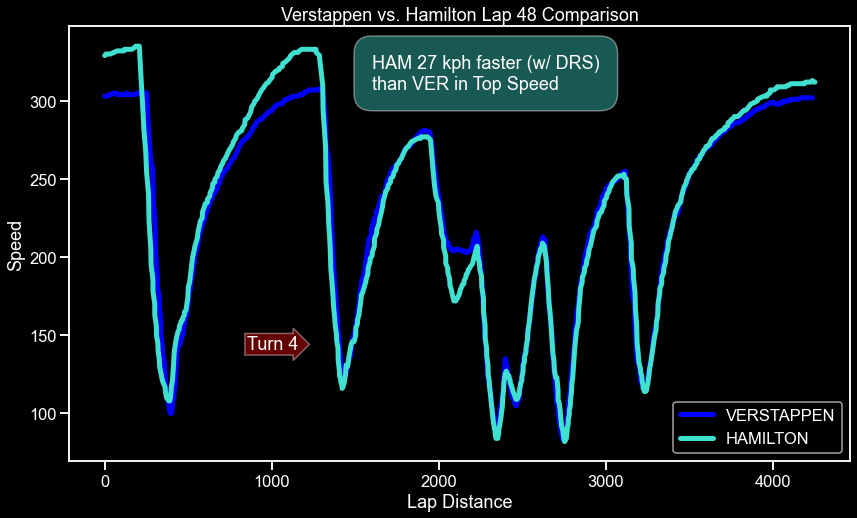

In [74]:
plt.figure(figsize=(14, 8))
delta = round(inc_HAM_t.Speed.max() - inc_VER_t.Speed.max(), 2)
sns.lineplot(x='Distance', y='Speed', data=inc_VER_t, label='VERSTAPPEN', color='blue', linewidth=5)
sns.lineplot(x='Distance', y='Speed', data=inc_HAM_t, label='HAMILTON', color='turquoise', linewidth=5)
plt.title("Verstappen vs. Hamilton Lap 48 Comparison")
plt.text(1600, 330, f"HAM {delta} kph faster (w/ DRS)\nthan VER in Top Speed", \
    verticalalignment='top', bbox=dict(boxstyle='round,pad=1', \
    facecolor='turquoise', alpha=0.4))
plt.text(850, 150, f"Turn 4", \
    verticalalignment='top', bbox=dict(boxstyle='rarrow,pad=0.1', \
    facecolor='red', alpha=0.4))
plt.legend()
plt.xlabel("Lap Distance")
plt.savefig("out/ver_ham_lap_48.png")
plt.show()

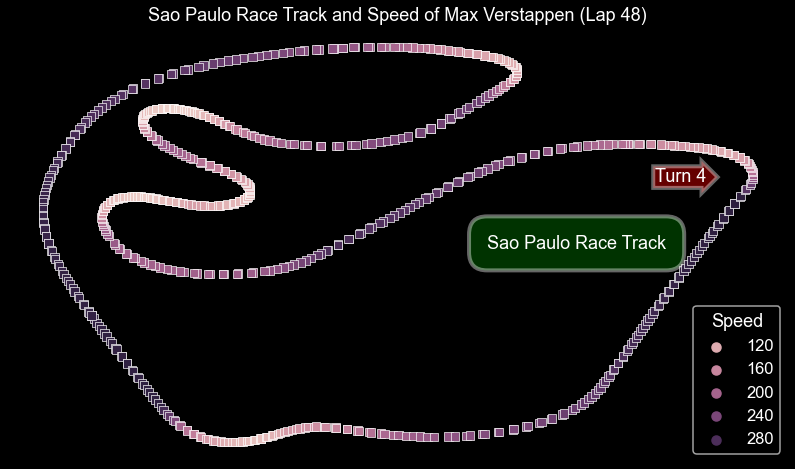

In [76]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='X', y='Y', data=inc_VER_t, marker="s", s=70, hue='Speed')
plt.text(-550, 60, f"Sao Paulo Race Track", \
    verticalalignment='top', bbox=dict(boxstyle='round,pad=1', \
    facecolor='green', alpha=0.4, linewidth=4))

plt.text(1000, 1800, f"Turn 4", \
    verticalalignment='top', bbox=dict(boxstyle='rarrow,pad=0.1', \
    facecolor='red', alpha=0.4, linewidth=4))
plt.axis('off')
plt.title("Sao Paulo Race Track and Speed of Max Verstappen (Lap 48)")
plt.savefig("out/race_track_ver.png")
plt.show()

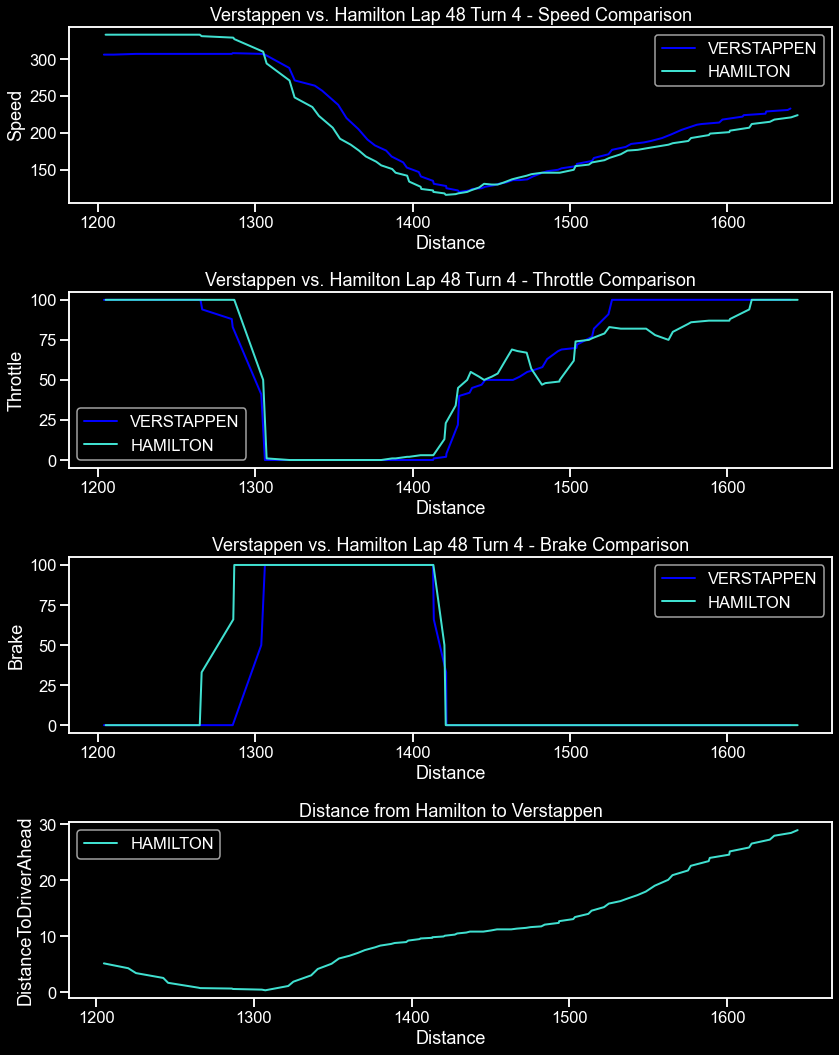

In [91]:
start = 1200
stop = 1650
sub_ver = inc_VER_t.loc[(inc_VER_t.Distance < stop) & (inc_VER_t.Distance > start)]
sub_ham = inc_HAM_t.loc[(inc_HAM_t.Distance < stop) & (inc_HAM_t.Distance > start)]

plt.figure(figsize=(12, 15))

plt.subplot(4, 1, 1)
sns.lineplot(x='Distance', y='Speed', data=sub_ver, label='VERSTAPPEN', color='blue', linewidth=2)
sns.lineplot(x='Distance', y='Speed', data=sub_ham, label='HAMILTON', color='turquoise', linewidth=2)
plt.title("Verstappen vs. Hamilton Lap 48 Turn 4 - Speed Comparison")

plt.subplot(4, 1, 2)
sns.lineplot(x='Distance', y='Throttle', data=sub_ver, label='VERSTAPPEN', color='blue', linewidth=2)
sns.lineplot(x='Distance', y='Throttle', data=sub_ham, label='HAMILTON', color='turquoise', linewidth=2)
plt.title("Verstappen vs. Hamilton Lap 48 Turn 4 - Throttle Comparison")

plt.subplot(4, 1, 3)
sns.lineplot(x='Distance', y='Brake', data=sub_ver, label='VERSTAPPEN', color='blue', linewidth=2)
sns.lineplot(x='Distance', y='Brake', data=sub_ham, label='HAMILTON', color='turquoise', linewidth=2)
plt.title("Verstappen vs. Hamilton Lap 48 Turn 4 - Brake Comparison")

plt.subplot(4, 1, 4)
sns.lineplot(x='Distance', y='DistanceToDriverAhead', data=sub_ham, label='HAMILTON', color='turquoise', linewidth=2)
plt.title("Distance from Hamilton to Verstappen")

plt.tight_layout()
plt.savefig("out/turn_4_compare.png")
plt.show()

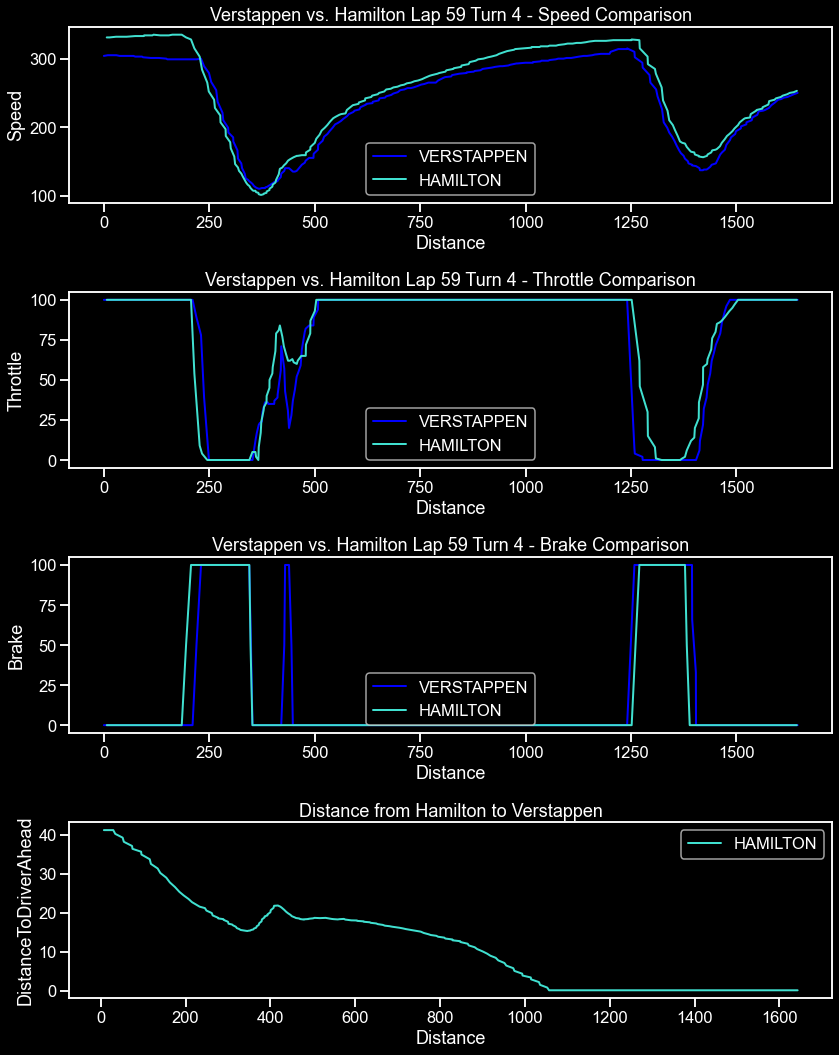

In [93]:
inc_VER = race_laps.pick_driver(33).loc[race_laps.LapNumber == 59]
inc_HAM = race_laps.pick_driver(44).loc[race_laps.LapNumber == 59]
inc_VER_t = inc_VER.get_telemetry().add_distance()
inc_HAM_t = inc_HAM.get_telemetry().add_distance()
start = 0
stop = 1650
sub_ver = inc_VER_t.loc[(inc_VER_t.Distance < stop) & (inc_VER_t.Distance > start)]
sub_ham = inc_HAM_t.loc[(inc_HAM_t.Distance < stop) & (inc_HAM_t.Distance > start)]

plt.figure(figsize=(12, 15))

plt.subplot(4, 1, 1)
sns.lineplot(x='Distance', y='Speed', data=sub_ver, label='VERSTAPPEN', color='blue', linewidth=2)
sns.lineplot(x='Distance', y='Speed', data=sub_ham, label='HAMILTON', color='turquoise', linewidth=2)
plt.title("Verstappen vs. Hamilton Lap 59 Turn 4 - Speed Comparison")

plt.subplot(4, 1, 2)
sns.lineplot(x='Distance', y='Throttle', data=sub_ver, label='VERSTAPPEN', color='blue', linewidth=2)
sns.lineplot(x='Distance', y='Throttle', data=sub_ham, label='HAMILTON', color='turquoise', linewidth=2)
plt.title("Verstappen vs. Hamilton Lap 59 Turn 4 - Throttle Comparison")

plt.subplot(4, 1, 3)
sns.lineplot(x='Distance', y='Brake', data=sub_ver, label='VERSTAPPEN', color='blue', linewidth=2)
sns.lineplot(x='Distance', y='Brake', data=sub_ham, label='HAMILTON', color='turquoise', linewidth=2)
plt.title("Verstappen vs. Hamilton Lap 59 Turn 4 - Brake Comparison")

plt.subplot(4, 1, 4)
sns.lineplot(x='Distance', y='DistanceToDriverAhead', data=sub_ham, label='HAMILTON', color='turquoise', linewidth=2)
plt.title("Distance from Hamilton to Verstappen")

plt.tight_layout()
plt.savefig("out/turn_4_compare_59.png")
plt.show()